In [1]:
import scipy
import numpy as np
from sklearn.metrics import pairwise_distances
import networkx as nx
import pandas as pd

In [2]:
POINTS_ARRAY = np.random.uniform(size = (5,3))
POINTS_ARRAY

array([[0.13315872, 0.22912304, 0.16525823],
       [0.33168508, 0.12601528, 0.48840998],
       [0.80955147, 0.41707272, 0.03061178],
       [0.52808844, 0.6529809 , 0.78017463],
       [0.72474225, 0.08995927, 0.44776406]])

In [3]:
distance_matrix = pairwise_distances(POINTS_ARRAY).round(2)
distance_matrix

array([[0.  , 0.39, 0.71, 0.84, 0.67],
       [0.39, 0.  , 0.72, 0.63, 0.4 ],
       [0.71, 0.72, 0.  , 0.83, 0.54],
       [0.84, 0.63, 0.83, 0.  , 0.68],
       [0.67, 0.4 , 0.54, 0.68, 0.  ]])

In [4]:
mst = scipy.sparse.csgraph.minimum_spanning_tree(distance_matrix)
print(mst)

  (0, 1)	0.39
  (1, 3)	0.63
  (4, 1)	0.4
  (4, 2)	0.54


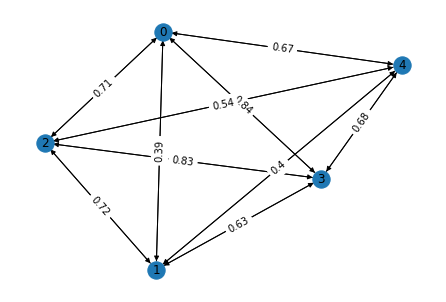

In [5]:
G = nx.from_numpy_matrix(distance_matrix, create_using=nx.DiGraph)
layout = nx.spring_layout(G)
nx.draw(G, layout, with_labels = True)
labels = nx.get_edge_attributes(G, "weight")
_ = nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=labels)

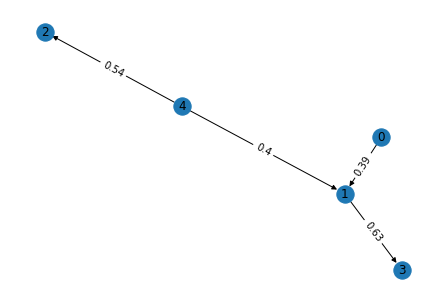

In [6]:
G = nx.from_numpy_matrix(mst.toarray(), create_using=nx.DiGraph)
layout = nx.spring_layout(G)
nx.draw(G, layout, with_labels = True)
labels = nx.get_edge_attributes(G, "weight")
_ = nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=labels)

In [7]:
mst_cords = mst.tocoo()
mst_df = pd.DataFrame({'src':mst_cords.row, 'dst':mst_cords.col, 'dist':mst_cords.data})
mst_df = mst_df.sort_values(by='dist').reset_index(drop = True)

In [112]:
class Component:
    def __init__(self, vertices, polygon):
        self.vertices = vertices
        self.polygon = polygon

In [120]:
class NaiveDisjoinSet:
    def __init__(self, n_points):
        self.universal = [Component({i}, [(0,0), (0,0)]) for i in range(n_points)]
    def Find(self, a):
        for ele in self.universal:
            if a in ele.vertices:
                return ele
        raise Exception("Element Not Found")
    def Union(self, a, b, merged_hull):
        s1 = self.Find(a)
        s2 = self.Find(b)
        if s1.vertices == s2.vertices:
            raise Exception("Elements belong to same set")
        s3 = s1.vertices.union(s2.vertices)
        nc = Component(s3, merged_hull)
        self.universal.remove(s1)
        self.universal.remove(s2)
        self.universal.append(nc)
        
        
        
# nd = NaiveDisjoinSet(5)
# print(nd.universal[0].vertices)
# nd.Find(4).vertices
# nd.Union(1, 2, [(0,0), (0,1), (0,0)])
# nd.Find(2)
# nd.Union(3, 1)
# nd.Find(1)
# nd.Find(2)
# nd.Find(4)
# nd.Find(2)

In [121]:
# np.Inf

In [141]:
def find_angle(p1, p2, trans):
    x = p2[0] - p1[0]
    y = p2[1] - p1[1]
    n = np.sqrt(x*x + y*y)
    x = x/n
    y = y/n
    trans['cos'] = x
    trans['sin'] = np.sqrt(1 - x*x)
    if y >= 0:
        trans['sin'] = -trans['sin']
    
    return trans
    
    
    

In [142]:
def alignHull(hull, p1, top):
    v= -1
    d2 = np.Inf
    for i, p2 in enumerate(hull):
        d = np.linalg.norm(np.array(p1) - np.array(p2))
        if d < d2:
            v = i
            d2 = d
    if top:
        v1 = hull[v]
        v2 = hull[v+1]
    trans = {}
    trans['tx'] = -hull[v][0]
    trans['ty'] = -hull[v][1]
    
    if len(hull) > 2:
        trans = find_angle(v1, v2, trans)
    else:
        trans['sin'] = 0
        trans['cos'] = 1
    return trans
        
        

In [143]:
def transform(p, t, yoff):
    x = p[0] + t['tx']
    y = p[1] + t['ty']
    xx = x*t['cos'] - y*t['sin']
    yy = x*t['sin'] + y*t['cos']
    yy += yoff
    return (xx, yy)

In [144]:
def transform_component(c, t, yoff):
    global verts
    for v in c.vertices:
        verts[v] = transform(verts[v], t, yoff)
        
        
        

In [152]:
def mergeComponents(c1_o,c2_o,v1,v2,length):
    global verts
    c1 = c1_o.vertices
    c2 = c2_o.vertices
    merged = set(list(c1)+list(c2))
#     print(merged)
    if length > 0:
        t1 = alignHull(c1_o.polygon, verts[v1], True)
        transform_component(c1_o, t1, 0)
        points = np.array([list(verts[v]) for v in merged])
        n_hull= scipy.spatial.ConvexHull(points)
        print(n_hull)
            
    

In [ ]:
def compute_convex_hull(points):
    if points.shape[1] 

In [153]:
nd = NaiveDisjoinSet(len(POINTS_ARRAY))

verts = {}
for i in range(len(POINTS_ARRAY)):
    verts[i] = (0,0)
    
for i in range(len(mst_df)):
    p1 = mst_df["src"][i]
    p2 = mst_df["dst"][i]

    c1 = nd.Find(p1)
    c2 = nd.Find(p2)
#     print(c1, c2)
    if c1.vertices == c2.vertices :
        print("Error")
    mergeComponents(c1,c2,p1,p2,mst_df["dist"][i])
    break


QhullError: QH6214 qhull input error: not enough points(2) to construct initial simplex (need 3)

While executing:  | qhull i Qt
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 1663616765  incidence  Qtriangulate  _pre-merge  _zero-centrum
  _maxoutside  0


In [147]:
verts

{0: (0, 0), 1: (0, 0), 2: (0, 0), 3: (0, 0), 4: (0, 0)}

In [137]:
nd.universal

In [45]:
nd.Find(p1)

{0}

In [27]:
c1

{(0, 0), 0}

In [29]:
c1 in nd.universal

True